In [1]:
# refrence:- https://www.kaggle.com/madz2000/cnn-using-keras-100-accuracy
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/sign-language-mnist/sign_mnist_train.csv
/kaggle/input/sign-language-mnist/amer_sign3.png
/kaggle/input/sign-language-mnist/american_sign_language.PNG
/kaggle/input/sign-language-mnist/sign_mnist_test.csv
/kaggle/input/sign-language-mnist/amer_sign2.png
/kaggle/input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv
/kaggle/input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv


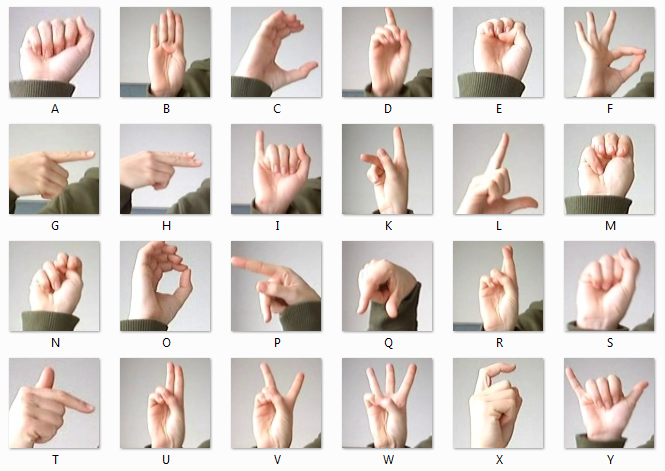

In [2]:
from IPython.display import Image
Image('../input/sign-language-mnist/amer_sign2.png')

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
# Read both files
train = pd.read_csv('../input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv')
test = pd.read_csv('../input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv')

In [5]:
test_y = pd.read_csv("../input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv")
y = test['label']

In [6]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [7]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [8]:
print(train.shape)
print(test.shape)

(27455, 785)
(7172, 785)


In [9]:
# for further processing and visualization we will convert df into numpy arrays
train_set = np.array(train, dtype='float32')
test_set  = np.array(test, dtype='float32')

In [10]:
# specify the class labels
c_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
           'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y' ]

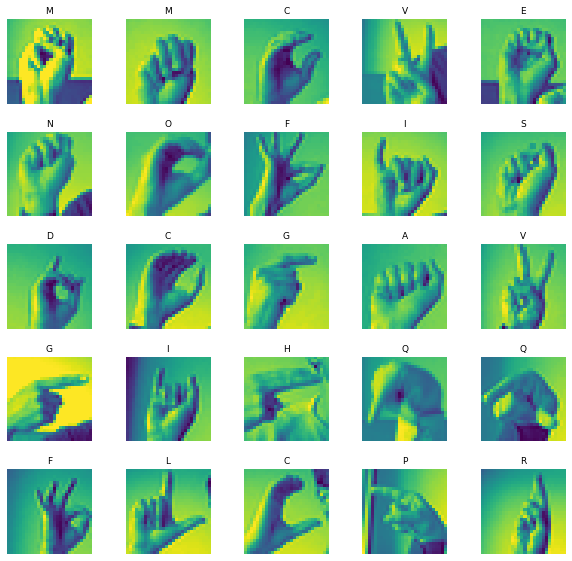

In [11]:
# plot different images from train_set with c_labels
fig, axes = plt.subplots(5,5, figsize=(10,10))
axes = axes.ravel() # Return a contiguous flattened array.
n_train = len(train_set) # get the length of train data

for i in range(0, 25):
    # select the random number
    index = np.random.randint(0, n_train)
    # read and display the images with selected index
    axes[i].imshow(train_set[index, 1:].reshape((28,28)))
    label_index = int(train_set[index, 0])
    axes[i].set_title(c_names[label_index], fontsize=9)
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.4)

In [12]:
y_train = train['label']
y_test = test['label']
del train['label']
del test['label']

In [13]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)

In [14]:
x_train = train.values
x_test = test.values

In [15]:
print(x_train.shape)
print(x_test.shape)

(27455, 784)
(7172, 784)


In [16]:
# Reshaping the data from 1-D to 3-D as required through input by CNN's
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [17]:
print(x_train.shape)
print(x_test.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [18]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=10, zoom_range = 0.1, width_shift_range=0.1, 
                                                          height_shift_range=0.1)
datagen.fit(x_train)

## Training the model

In [19]:
lr_schedule = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_accuracy", factor=0.5, patience=2,
                                                   mode="max", min_lr=1e-5)

In [20]:
def create_model():
    inputs = tf.keras.layers.Input(shape=(28,28,1), name='input')
    x = tf.keras.layers.Conv2D(75, (3,3), strides = 1 , padding = 'same' , activation = 'relu')(inputs)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2, padding='same')(x)
    
    x = tf.keras.layers.Conv2D(50, (3,3), strides = 1 , padding = 'same' , activation = 'relu')(x)
    x = tf.keras.layers.Dropout(0.2)(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2, padding='same')(x)
    
    x = tf.keras.layers.Conv2D(25, (3,3), strides = 1 , padding = 'same' , activation = 'relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2, padding='same')(x)
    
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(512, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.3)(x)
    outputs = tf.keras.layers.Dense(24, activation='softmax', name='outputs')(x)
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    
    model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
    return model

In [21]:
model = create_model()
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 75)        750       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 75)        300       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 75)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 50)        33800     
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 50)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 50)        200   

In [22]:
history = model.fit(datagen.flow(x_train, y_train, batch_size=128), epochs=20, validation_data=(x_test, y_test),
                    callbacks=[lr_schedule])

Epoch 1/20
215/215 [==============================] - 9s 44ms/step - loss: 1.1021 - accuracy: 0.6601 - val_loss: 0.5718 - val_accuracy: 0.7822 - lr: 0.0010
Epoch 2/20
215/215 [==============================] - 9s 43ms/step - loss: 0.2086 - accuracy: 0.9314 - val_loss: 0.2194 - val_accuracy: 0.9269 - lr: 0.0010
Epoch 3/20
215/215 [==============================] - 10s 47ms/step - loss: 0.1079 - accuracy: 0.9649 - val_loss: 0.0871 - val_accuracy: 0.9762 - lr: 0.0010
Epoch 4/20
215/215 [==============================] - 9s 43ms/step - loss: 0.0680 - accuracy: 0.9779 - val_loss: 0.0332 - val_accuracy: 0.9895 - lr: 0.0010
Epoch 5/20
215/215 [==============================] - 9s 43ms/step - loss: 0.0468 - accuracy: 0.9855 - val_loss: 0.0874 - val_accuracy: 0.9721 - lr: 0.0010
Epoch 6/20
215/215 [==============================] - 9s 44ms/step - loss: 0.0380 - accuracy: 0.9875 - val_loss: 0.0148 - val_accuracy: 0.9948 - lr: 0.0010
Epoch 7/20
215/215 [==============================] - 10s 45ms/

Text(0.5, 1.0, 'Accuracy evolution')

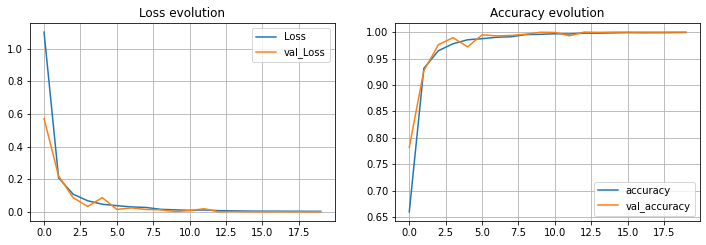

In [23]:
#Visualizing the training performance
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.legend()
plt.grid()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.grid()
plt.title('Accuracy evolution')

In [24]:
model.save('model_s.h5')

In [25]:
from keras.models import load_model
m = load_model('model_s.h5')

In [26]:
test_acc = m.evaluate(x_test,y_test,batch_size=128)[1]*100
test_acc

57/57 [==============================] - 0s 4ms/step - loss: 2.5362e-04 - accuracy: 1.0000


100.0

In [27]:
y_pred = m.predict(x_test)
predictions = np.argmax(y_pred,axis=1)
for i in range(len(predictions)):
    if(predictions[i] >= 9):
        predictions[i] += 1
predictions[:5]  

array([ 6,  5, 10,  0,  3])

In [28]:
classes = ['Class'+str(i) for i in range(25) if i!=9]
print(classification_report(predictions,y, target_names=classes))

              precision    recall  f1-score   support

      Class0       1.00      1.00      1.00       331
      Class1       1.00      1.00      1.00       432
      Class2       1.00      1.00      1.00       310
      Class3       1.00      1.00      1.00       245
      Class4       1.00      1.00      1.00       498
      Class5       1.00      1.00      1.00       247
      Class6       1.00      1.00      1.00       348
      Class7       1.00      1.00      1.00       436
      Class8       1.00      1.00      1.00       288
     Class10       1.00      1.00      1.00       331
     Class11       1.00      1.00      1.00       209
     Class12       1.00      1.00      1.00       394
     Class13       1.00      1.00      1.00       291
     Class14       1.00      1.00      1.00       246
     Class15       1.00      1.00      1.00       347
     Class16       1.00      1.00      1.00       164
     Class17       1.00      1.00      1.00       144
     Class18       1.00    

In [29]:
cm = confusion_matrix(y, predictions)

In [30]:
cm = pd.DataFrame(cm , index = [i for i in range(25) if i != 9] , columns = [i for i in range(25) if i != 9])

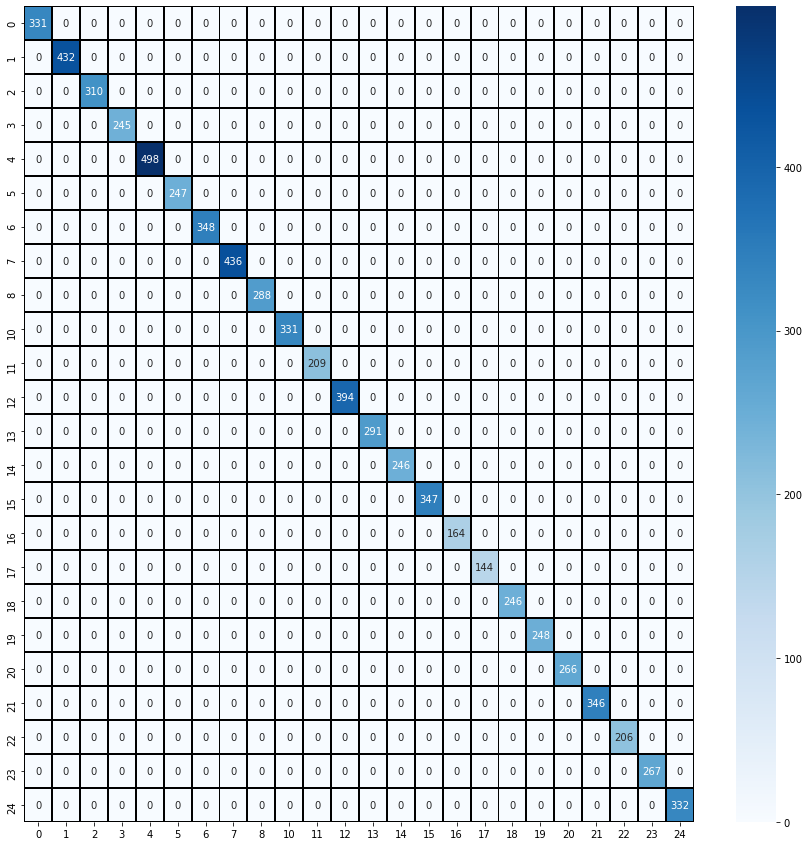

In [31]:
plt.figure(figsize=(15,15))
sns.heatmap(cm, cmap='Blues', linecolor='black', linewidth=1, annot=True, fmt='');

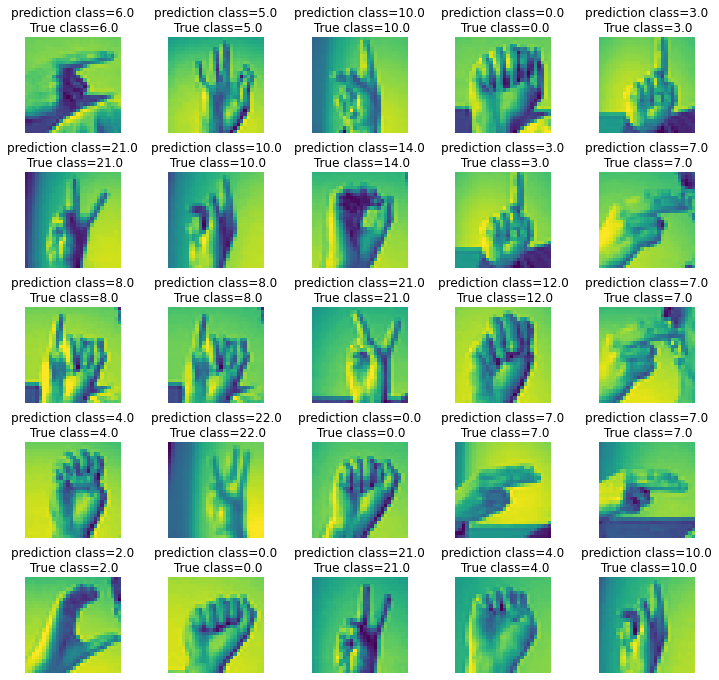

In [32]:
# visualize prediction
fig, axes = plt.subplots(5,5, figsize=(12,12))
axes = axes.ravel()

for i in range(0, 25):
    axes[i].imshow(x_test[i].reshape(28, 28))
    axes[i].set_title(f"prediction class={predictions[i]:0.1f}\n True class={y[i]:0.1f}")
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)